# Make figures

To run this notebook, the GWP notebook must first be run (for the base case, and adjust drydep to 80 and 50 Tg/yr)

To do: 
- Select nice colors for the models
- Enhance markersize
- Check units
- Add strat ozone DU 60S-60N and >60S + >60N
- Fix size of figures


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})
colorlist = ['C1','C2','C3','C4','C5','C6']

In [3]:
filepath= r"./output/"
df_drydep80_table_per_flux = pd.read_csv(filepath+'drydep_80_table_per_flux_h2.csv',index_col=0)
df_drydep50_table_per_flux = pd.read_csv(filepath+'drydep_50_table_per_flux_h2.csv',index_col=0)
df_table_per_flux = pd.read_csv(filepath+'table_per_flux_h2.csv',index_col=0)
df_table_per_flux

,deltaH2,surf_h2_per_h2_flux,surf_ch4_per_h2_flux,ch4_flux_per_h2_flux,ch4_rf_per_h2_flux,trop_du_ozone_per_h2_flux,strat_du_ozone_per_h2_flux,ozone_rf_per_h2_flux,h2o_rf_per_h2_flux
GFDL-emi,196.311300,6.859004,1.003508,0.230133,0.444554,0.003714,-0.001153,0.173239,0.143968
INCA,7.194500,7.394537,1.169922,0.292521,0.518275,0.004070,-0.003812,0.155216,0.055529
OSLOCTM3,8.535837,6.232546,1.085105,0.312956,0.480701,0.004506,0.001156,0.219158,0.158332
WACCM6-2deg,9.920550,5.360287,1.160615,0.340458,0.514152,0.002780,-0.001285,0.142341,0.052265


## Surface H2 concentration by 1 Tg H2/yr

In [4]:
tittel = 'Surface conc H2 by 1 Tg H2/yr'
ytittel ='[ppb H2/(Tg H2 yr-1)]'
field = 'surf_h2_per_h2_flux'
legend = True #False


In [5]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]
plot_values

GFDL-emi       6.859004
INCA           7.394537
OSLOCTM3       6.232546
WACCM6-2deg    5.360287
Name: surf_h2_per_h2_flux, dtype: float64

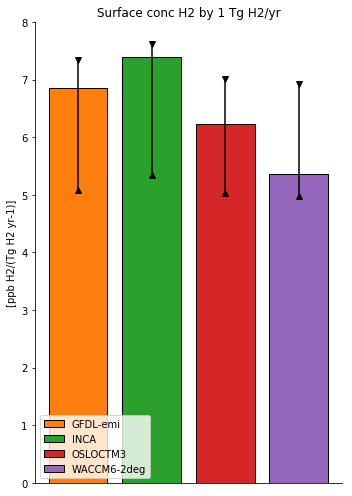

In [6]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    #print(model)
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()


## Methane flux by 1 Tg H2/yr

In [7]:
tittel = 'Methane flux by 1 Tg H2'
ytittel ='[Tg CH4/Tg H2]'
field = 'ch4_flux_per_h2_flux'
legend = True #False

In [8]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

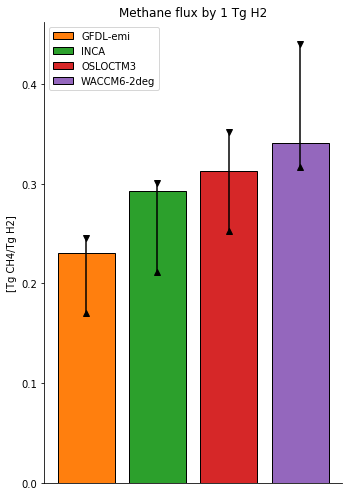

In [9]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    #print(model)
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()


## Methane RF per flux

In [10]:
tittel = 'Methane RF by 1 Tg H2'
ytittel ='[mW m-2/(Tg H2 yr$^{-1}$)]'
field = 'ch4_rf_per_h2_flux'
legend = True


In [11]:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

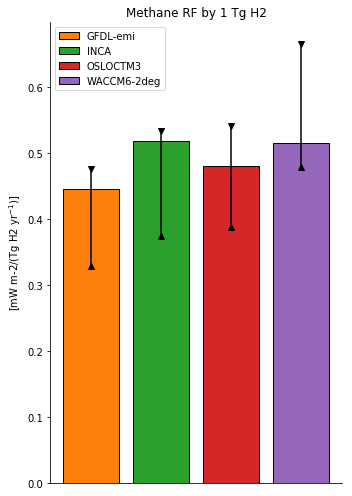

In [12]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    #print(model)
    
    plt.bar(m,plot_values.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.plot([m,m],[plot_values_max_dry.loc[model],plot_values_min_dry.loc[model]],color='k')
    plt.plot(m,plot_values_max_dry.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model],marker='v',color='black')
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()


## Tropospheric ozone by H2 flux

In [13]:
tittel = 'Tropospheric ozone by H2 flux'
ytittel ='[DU yr/Tg H2]'
field = 'trop_du_ozone_per_h2_flux'
legend = True

For the following figures, add the methane induced effect

In [14]:
#Indirect effect via Methane.
df_drydep80_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_80_table_per_flux_ch4.csv',index_col=0)
df_drydep50_table_per_flux_ch4 = pd.read_csv(filepath+'drydep_50_table_per_flux_ch4.csv',index_col=0)
df_table_per_flux_ch4 = pd.read_csv(filepath+'table_per_flux_ch4.csv',index_col=0)


In [15]:
field_ch4 = field.replace('h2_','ch4_')
print(field)
print(field_ch4)

trop_du_ozone_per_h2_flux
trop_du_ozone_per_ch4_flux


In [16]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]
plot_values
#print(plot_values_max_dry)
#print(plot_values_min_dry)

GFDL-emi       0.003714
INCA           0.004070
OSLOCTM3       0.004506
WACCM6-2deg    0.002780
Name: trop_du_ozone_per_h2_flux, dtype: float64

In [17]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [19]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_du_trop.txt'
df_ozone_du_trop = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be tropospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_du_trop['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_trop['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_trop['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']




GFDL-emi
INCA
OSLOCTM3
WACCM6-2deg


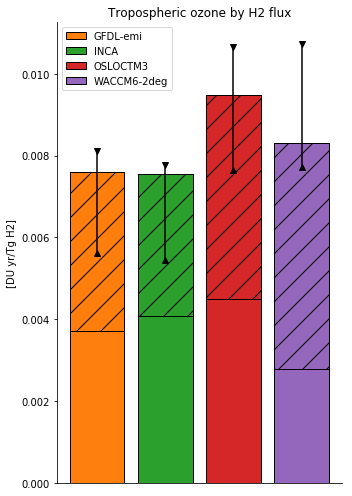

In [20]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    print(model)
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

## Stratospheric ozone by H2 flux

In [21]:
tittel = 'Stratospheric ozone by H2 flux'
ytittel ='[DU yr/Tg H2]'
field = 'strat_du_ozone_per_h2_flux'
legend = True #False

In [22]:
field_ch4 = field.replace('h2_','ch4_')

In [23]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [24]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']


In [25]:
#Add GFDL numbers:
inputpath = r"/mnt/c/Users/ragnhibs/OneDrive - CICERO senter for klimaforskning/Documents/Hydrogen/Hydrogen_prosjektet/GWP_calc/GWP_notebook/input/"
file = 'ozone_du_strat.txt'
df_ozone_du_strat = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be stratospheric ozone [DU] in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_du_strat['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']



FileNotFoundError: File b'/mnt/c/Users/ragnhibs/OneDrive - CICERO senter for klimaforskning/Documents/Hydrogen/Hydrogen_prosjektet/GWP_calc/GWP_notebook/input/ozone_du_strat.txt' does not exist

GFDL-emi
INCA
OSLOCTM3
WACCM6-2deg


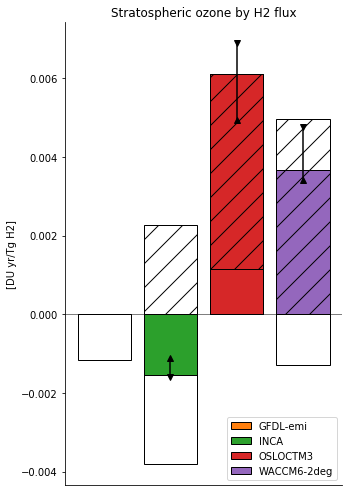

In [26]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    print(model)
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

## Ozone RF by 1 Tg H2

In [27]:
tittel = 'Ozone RF by 1 Tg H2'
ytittel ='[mW m-1 yr/Tg H2]'
field = 'ozone_rf_per_h2_flux'
legend = True #False

In [28]:
field_ch4 = field.replace('h2_','ch4_')

In [29]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [30]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']

In [34]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'ozone_rf.txt'
df_ozone_rf = pd.read_csv(inputpath+file, sep=';',index_col=0,header=0)
#This should be ozone RF in H2+CH4 minus H2. 
plot_values_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = df_ozone_rf['GFDL-emi'].loc['10CH4']/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']



GFDL-emi
INCA
OSLOCTM3
WACCM6-2deg


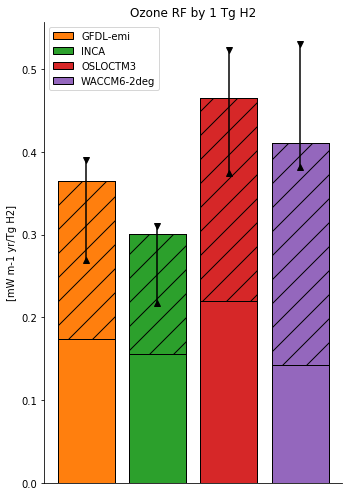

In [35]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    print(model)
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()

## Strat. H2O RF by 1 Tg H2

In [36]:
tittel = 'Strat. H2O RF by 1 Tg H2'
ytittel ='[mW m-1 yr/Tg H2]'
field = 'h2o_rf_per_h2_flux'
legend = True


In [37]:
field_ch4 = field.replace('h2_','ch4_')

In [38]:
#Direct effect:
plot_values = df_table_per_flux[field]
plot_values_max_dry = df_drydep80_table_per_flux[field]
plot_values_min_dry = df_drydep50_table_per_flux[field]

In [39]:
#Indirect effect:
plot_values_ch4 = df_table_per_flux_ch4[field_ch4]*df_table_per_flux['ch4_flux_per_h2_flux']
plot_values_max_dry_ch4 = df_drydep80_table_per_flux_ch4[field_ch4]*df_drydep80_table_per_flux['ch4_flux_per_h2_flux']
plot_values_min_dry_ch4 = df_drydep50_table_per_flux_ch4[field_ch4]*df_drydep50_table_per_flux['ch4_flux_per_h2_flux']

In [40]:
#Add GFDL numbers:
inputpath = r"./input/"
file = 'H2O_rf_gfdl.txt'
df_h2o_rf = pd.read_csv(inputpath+file, sep=',',index_col=0,header=0)

gfdl_emi_ch4 = df_h2o_rf.loc['H2+CH4 [mW m-2]'] - df_h2o_rf.loc['H2 [mW m-2]']

#gfdl_emi_ch4

plot_values_ch4['GFDL-emi'] = gfdl_emi_ch4/df_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_max_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep80_table_per_flux['deltaH2'].loc['GFDL-emi']
plot_values_min_dry_ch4['GFDL-emi'] = gfdl_emi_ch4/df_drydep50_table_per_flux['deltaH2'].loc['GFDL-emi']



GFDL-emi
INCA
OSLOCTM3
WACCM6-2deg


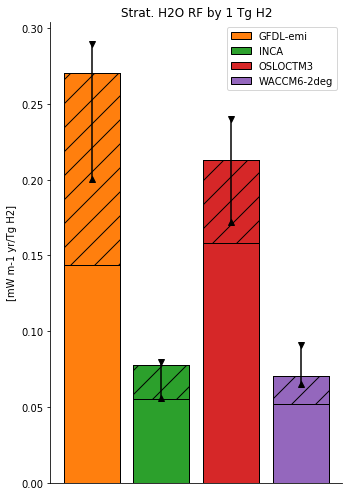

In [41]:
plt.figure(figsize=(5,7))
for m,model in enumerate(plot_values.index):
    print(model)
    
    plt.bar(m,plot_values.loc[model]+plot_values_ch4.loc[model],edgecolor='black',color=colorlist[m],label=model)
    plt.bar(m,plot_values.loc[model],edgecolor='black',fill=False,color=colorlist[m])
    if(plot_values.loc[model]<0 and plot_values_ch4.loc[model]>0):
        plt.bar(m,plot_values_ch4.loc[model],bottom=0.0,fill=False,edgecolor='black',hatch='/')
    else:
        plt.bar(m,plot_values_ch4.loc[model],bottom=plot_values.loc[model],fill=False,edgecolor='black',hatch='/')

    plt.plot(m,plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],marker='^',color='black')
    plt.plot(m,plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model],marker='v',color='black')
    
    plt.plot([m,m],[plot_values_max_dry.loc[model]+plot_values_max_dry_ch4.loc[model],plot_values_min_dry.loc[model]+plot_values_min_dry_ch4.loc[model]],color='k')

plt.axhline(y=0, color='black',linewidth=0.5,zorder=-10)    
    
ax=plt.gca()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title(tittel)
plt.ylabel(ytittel)
if legend:
    plt.legend()
plt.tick_params(labelbottom = False, bottom = False)
plt.tight_layout()